# Anomaly detection

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
 
data = loadmat('ex8data1.mat')  
X = data['X']   
# TODO: amount of data
print(X.shape)

(307, 2)


In [6]:
display(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 15:37:10 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[13.04681517, 14.74115241],
        [13.40852019, 13.7632696 ],
        [14.19591481, 15.85318113],
        [14.91470077, 16.17425987],
        [13.57669961, 14.04284944],
        [13.92240251, 13.40646894],
        [12.82213164, 14.22318782],
        [15.67636615, 15.89169137],
        [16.16287532, 16.20299807],
        [12.66645095, 14.89908374],
        [13.98454962, 12.95800822],
        [14.06146043, 14.54908874],
        [13.38988671, 15.56202142],
        [13.39350475, 15.62698794],
        [13.97900926, 13.28061494],
        [14.16791259, 14.46583829],
        [13.96176145, 14.75182421],
        [14.45899735, 15.07018563],
        [14.58476372, 15.82743424],
        [12.07427074, 13.0671109 ],
        [13.5491294 , 15.53827677],
        [13.98625042, 14.78776304],
        [14.96991942, 16.51830493],
        [14.25576597, 15.294

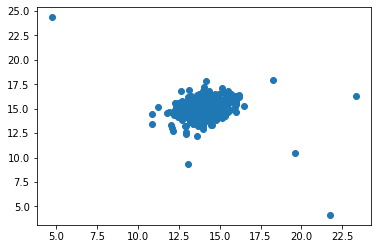

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

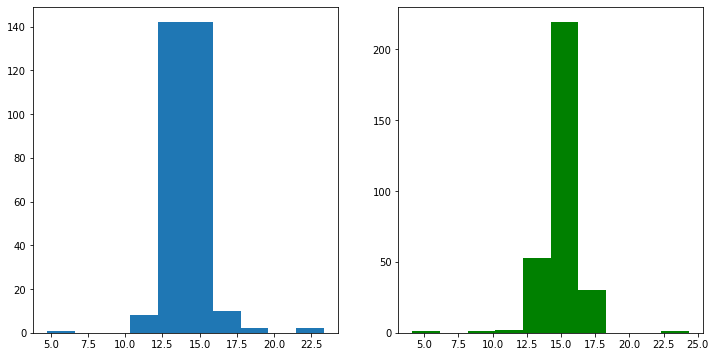

In [5]:
plt.figure(figsize =(12, 6))
plt.subplot(1,2,1)
plt.hist(X[:,0])
plt.subplot(1,2,2)
plt.hist(X[:,1], color = 'green')
plt.show()

### Gaussian distribution

In [10]:
def estimate_gaussian(X):  
 
    # TODO: calculate mu and sigma
    mu = np.array([np.mean(X[:,0]), np.mean(X[:,1])])
    sigma = np.array([np.std(X[:,0]), np.std(X[:,1])])
 
    return mu, sigma
 
# TODO: run the function for your dataset
mu, sigma = estimate_gaussian(X)
print(mu, sigma)

[14.11222578 14.99771051] [1.35374717 1.3075723 ]


### Calculate probability

In [12]:
Xval = data['Xval']  
yval = data['yval']
 
# TODO: check the number of data (X.shape)
print(Xval.shape, yval.shape)

(307, 2) (307, 1)


In [15]:
from scipy import stats
# TODO: calculate the probability for X data

proba = stats.norm.pdf(x=X[0:50, :], loc=mu, scale=sigma)
print(proba)

[[0.21620977 0.29928475]
 [0.25745208 0.19539236]
 [0.29413223 0.24631896]
 [0.24721192 0.20353285]
 [0.27251547 0.23369303]
 [0.2918119  0.14549894]
 [0.18713958 0.25600918]
 [0.15117648 0.24151341]
 [0.09356331 0.19949913]
 [0.166609   0.30423483]
 [0.29338708 0.09037578]
 [0.29448769 0.28766234]
 [0.25559237 0.27797121]
 [0.25595621 0.27173864]
 [0.2932714  0.12881868]
 [0.2944456  0.28087687]
 [0.29288017 0.29975441]
 [0.28518331 0.3046332 ]
 [0.27727759 0.24946431]
 [0.09489765 0.10258106]
 [0.27027271 0.28011206]
 [0.29342161 0.30119392]
 [0.24110555 0.15516046]
 [0.29304288 0.29735436]
 [0.19607729 0.21044271]
 [0.15652979 0.15894753]
 [0.27590459 0.28665754]
 [0.25749622 0.29485051]
 [0.27667047 0.2921371 ]
 [0.2834953  0.27033816]
 [0.17068283 0.29362853]
 [0.29318613 0.30032058]
 [0.20432637 0.30239897]
 [0.19577297 0.30455403]
 [0.10897052 0.19181707]
 [0.24595126 0.18619014]
 [0.14063746 0.25129732]
 [0.29463374 0.27874829]
 [0.28052751 0.25820116]
 [0.29371857 0.2893207 ]


In [17]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))  
# TODO: calculate the probability for Xval data
pval[:,0] = stats.norm.pdf(x=Xval[:, 0], loc=mu[0], scale=sigma[0])
pval[:,1] = stats.norm.pdf(x=Xval[:, 0], loc=mu[1], scale=sigma[1])

### Selecting the threshold

In [18]:
from sklearn.metrics import f1_score

def select_threshold(pval, yval): 
    best_epsilon = 0
    best_f1 = 0
    it = np.linspace(pval.min(), pval.max(), 10000)
    for th in it:
        ypred = (pval[:,0] < th) | (pval[:,1] < th)
        f1_sc = f1_score(yval, ypred.astype(int))
        if f1_sc > best_f1:
            best_f1 = f1_sc
            best_epsilon = th
    return best_epsilon, best_f1

best_epsilon, best_f1 = select_threshold(pval, yval)
print(best_epsilon, best_f1)

0.0003966641502348015 0.8


### Anomaly detection result

[[13.07931049  9.34787812]
 [21.72713402  4.12623222]
 [19.58257277 10.411619  ]
 [23.33986753 16.29887355]
 [ 4.75261282 24.35040725]]


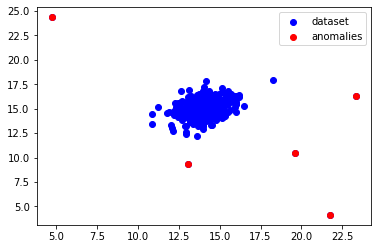

In [22]:
# TODO: find indexes where the p value is lower than epsilon. Use the np.where() function
p = np.zeros((X.shape[0], X.shape[1]))
p[:, 0] = stats.norm.pdf(X[:, 0], loc = mu[0], scale = sigma[0])
p[:, 1] = stats.norm.pdf(X[:, 1], loc = mu[1], scale = sigma[1])
anom = np.where((p[:, 0] < best_epsilon) | (p[:, 1] < best_epsilon))
anomalies = [X[i] for i in anom][0]
print(anomalies)

# TODO: plot the data and analyse the outcome. Use plt.scatter() function
plt.scatter(X[:,0], X[:,1], color = 'blue', label = 'dataset')
plt.scatter(anomalies[:,0], anomalies[:,1], color = 'red', label = 'anomalies')
plt.legend()
plt.show()